In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # 텐서플로우 버전 1로 낮추기 (버전 2 기능 사용불가하게 만들기)

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# from tensorflow.examples.tutorials.mnist import input_data
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [41]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [42]:
xtrain.shape
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
xtrain[-1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [44]:
# 훈련셋/검증셋 분리
xval = xtrain[50000:]
yval = ytrain[50000:]
xtrain = xtrain[:50000]
ytrain = ytrain[:50000]

In [45]:
xtrain = xtrain.reshape(50000,784).astype('float32')/255.0
xval = xval.reshape(10000,784).astype('float32')/255.0
xtest = xtest.reshape(10000,784).astype('float32')/255.0

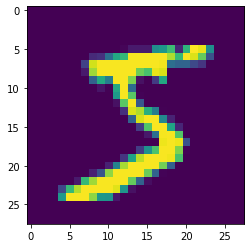

In [46]:
plt.imshow(xtrain[0].reshape(28,28))

In [47]:
trainRandIdx = np.random.choice(50000,700)
valRandIdx = np.random.choice(10000,300)

In [48]:
xtrain = xtrain[trainRandIdx] #700개만 랜덤하게 뽑아서 트레인 데이터로 쓰자
ytrain = ytrain[trainRandIdx]
xval = xval[valRandIdx]
yval = yval[valRandIdx]

In [49]:
# 케라스 코딩 과정
"""
1) 데이터셋 생성 (훈련/검증/시험 생성)
2) 모델구성 ( Seqeuntial:간단한 모델 , 함수API(복잡한 모델) )
3) 모델학습과정 설정(cost함수 정의 / 옵티마이저 정의(아담/GradientDesent/..))
    : compile 함수를 사용해서 정의할수있다
4) 모델학습시키기 (train data) - fit함수
5) 학습과정 확인 (훈련셋/검증셋 cost, 정확도 측정)->모델
6) 모델 평가 (test data) - evaluate 함수로 모델 평가
7) 모델 사용 - predict함수

"""

'\n1) 데이터셋 생성 (훈련/검증/시험 생성)\n2) 모델구성 ( Seqeuntial:간단한 모델 , 함수API(복잡한 모델) )\n3) 모델학습과정 설정(cost함수 정의 / 옵티마이저 정의(아담/GradientDesent/..))\n    : compile 함수를 사용해서 정의할수있다\n4) 모델학습시키기 (train data) - fit함수\n5) 학습과정 확인 (훈련셋/검증셋 cost, 정확도 측정)->모델\n6) 모델 평가 (test data) - evaluate 함수로 모델 평가\n7) 모델 사용 - predict함수\n\n'

In [50]:
ytrain.shape
ytrain = np_utils.to_categorical(ytrain)
yval = np_utils.to_categorical(yval)
ytest = np_utils.to_categorical(ytest)

In [51]:
print(ytrain.shape)
print(yval.shape)
print(ytest.shape)

(700, 10)
(300, 10)
(10000, 10)


In [52]:
# np_utils.to_categorical 의 역할
data = [2,3,9,0,1]
np_utils.to_categorical(data)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
# 2.모델 구성 (딥러닝 : 신경망모델 : 입력계층/히든계층/출력계층)
model = Sequential()

# 레이어설계 (input_dim : 입력데이터의 생김새)
# 입력:784, 출력 : 2인 레이어 추가 (add)
model.add(Dense( units=2, input_dim = 28*28, activation='relu' )) # 입력계층
# 히든계층 (입력계층의 units를 input으로 받아옴)
model.add(Dense( units=10, activation='softmax' ))

In [54]:
# 3. 모델 학습과정 설정 # https://keras.io/ko
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy']) # loss에는 cost 함수써줌

In [55]:
# 4. 모델 학습시키기
hist = model.fit(xtrain, ytrain, batch_size=10, epochs=1000, validation_data=(xval,yval))
"""
# verbose : 진행 바
# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.
모델을 학습하다가 더이상 좋아지지 않으면(상태)
모델링중단하도록 함.
"""

=========================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8657 - val_loss: 2.0185 - val_accuracy: 0.5200
Epoch 863/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.8686 - val_loss: 2.0098 - val_accuracy: 0.5200
Epoch 864/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8743 - val_loss: 2.0076 - val_accuracy: 0.5267
Epoch 865/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8700 - val_loss: 1.9960 - val_accuracy: 0.5200
Epoch 866/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.8686 - val_loss: 1.9923 - val_accuracy: 0.5200
Epoch 867/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8643 - val_loss: 1.9980 - val_accuracy: 0.5067
Epoch 868/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8700 - val_loss: 2.0177 - val_accuracy: 0.5200
Epoch 869/1000
70/7

'\n# verbose : 진행 바\n# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.\n모델을 학습하다가 더이상 좋아지지 않으면(상태)\n모델링중단하도록 함.\n'

In [64]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

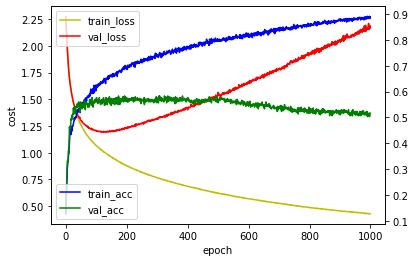

In [66]:
fig, axes = plt.subplots()
accax = axes.twinx()
axes.plot(hist.history['loss'], 'y', label='train_loss')
axes.plot(hist.history['val_loss'], 'r', label='val_loss')
accax.plot(hist.history['accuracy'], 'b', label='train_acc')
accax.plot(hist.history['val_accuracy'], 'g', label='val_acc')
axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_xlabel('accuracy')
axes.legend(loc="upper left")
accax.legend(loc="lower left")
plt.show()

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
# 1.데이터셋 생성 (훈련/검증/시험 생성)
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
xtrain = xtrain.reshape(60000,784).astype('float32')/255.0
xtest = xtest.reshape(10000,784).astype('float32')/255.0
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [4]:
# 2.모델 구성 (딥러닝 : 신경망모델 : 입력계층/히든계층/출력계층)
model = Sequential()

# 레이어설계 (input_dim : 입력데이터의 생김새)
# 입력:784, 출력 : 2인 레이어 추가 (add)
model.add(Dense( units=2, input_dim = 28*28, activation='relu' )) # 입력계층
# 히든계층 (입력계층의 units를 input으로 받아옴)
model.add(Dense( units=10, activation='softmax' ))

In [5]:
# 3. 모델 학습과정 설정 # https://keras.io/ko
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy']) # loss에는 cost 함수써줌

In [7]:
# 4. 모델 학습시키기
hist = model.fit(xtrain, ytrain, batch_size=32, epochs=5)
"""
# verbose : 진행 바
# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.
모델을 학습하다가 더이상 좋아지지 않으면(상태)
모델링중단하도록 함.
"""

Epoch 1/5
1875/1875 [==============================] - 1s 603us/step - loss: 1.8353 - accuracy: 0.3090
Epoch 2/5
1875/1875 [==============================] - 1s 609us/step - loss: 1.5126 - accuracy: 0.4150
Epoch 3/5
1875/1875 [==============================] - 1s 566us/step - loss: 1.3821 - accuracy: 0.4757
Epoch 4/5
1875/1875 [==============================] - 1s 598us/step - loss: 1.2555 - accuracy: 0.5786
Epoch 5/5
1875/1875 [==============================] - 1s 586us/step - loss: 1.1614 - accuracy: 0.6133


'\n# verbose : 진행 바\n# callbacks : 콜백함수 : 어떤 상태가 되었을 때 사전에 지정한 함수가 호출됨.\n모델을 학습하다가 더이상 좋아지지 않으면(상태)\n모델링중단하도록 함.\n'

In [8]:
# 모델 평가하기
model.evaluate(xtest, ytest, batch_size=32)

313/313 [==============================] - 0s 833us/step - loss: 1.1330 - accuracy: 0.6253


[1.1330331563949585, 0.6252999901771545]

In [16]:
import numpy as np
# 모델 사용하기 (분류)
yhat = model.predict(xtest[0:1])
np.sum(yhat[0])
np.max(yhat[0])
np.argmax(yhat[0]) # 7 (최대값에 해당하는 인덱스를 추출)
# xtest[0:1] 
# ytest[0:1] #7

7

In [11]:
yhat.sum()

1.0